## Importing Data

In [ ]:
#Import important Functions 
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Load the DUMD dataset
!gdown --id 116Fj5Yz4PCwVpCX0xLR3qqrr2fGYIEtP
!gdown --id 1v66yzArILqZKTOCpyHnuAbACB1IMFS3X

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=116Fj5Yz4PCwVpCX0xLR3qqrr2fGYIEtP
To: /content/DUMD_train.csv
100% 10.1k/10.1k [00:00<00:00, 8.97MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1v66yzArILqZKTOCpyHnuAbACB1IMFS3X
To: /content/DUMD_test.csv
100% 2.52k/2.52k [00:00<00:00, 3.08MB/s]


In [ ]:
#Load the DUMD dataset
df = pd.read_csv('/content/DUMD_train.csv')
df_test = pd.read_csv('/content/DUMD_test.csv')

In [ ]:
#present data
df_test.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.420,0.290,0.140,0.03,0.68,Medium
1,0.100,0.100,0.520,0.78,0.34,Medium
2,0.510,0.255,0.550,0.17,0.64,Medium
3,0.250,0.540,0.310,0.25,0.08,Very Low
4,0.258,0.250,0.295,0.33,0.77,High


In [ ]:
#checking if we have null values 
print(len(df))
df.info()

#we have no nulls 

323
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     323 non-null    float64
 1   SCG     323 non-null    float64
 2   STR     323 non-null    float64
 3   LPR     323 non-null    float64
 4   PEG     323 non-null    float64
 5   UNS     323 non-null    object 
dtypes: float64(5), object(1)
memory usage: 15.3+ KB


In [ ]:
#checking if we have outliers
df.describe()

#we don't have outliers

,STG,SCG,STR,LPR,PEG
count,323.000000,323.000000,323.000000,323.000000,323.000000
mean,0.355954,0.356598,0.460062,0.433533,0.457183
std,0.215300,0.215211,0.245813,0.259842,0.267962
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195000,0.200000,0.265000,0.240000,0.250000
50%,0.310000,0.300000,0.460000,0.350000,0.450000
75%,0.490000,0.510000,0.670000,0.650000,0.660000
max,0.910000,0.900000,0.950000,0.990000,0.990000


## Choosing two features 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


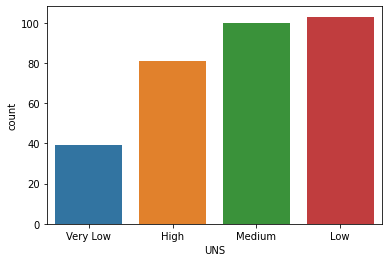

In [ ]:
# UNS (The knowledge level of user) (target value)
sns.countplot(df.UNS)

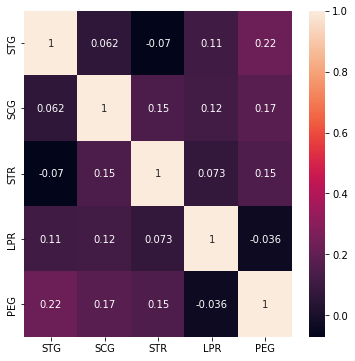

In [ ]:
#showing the Correlation between features using Correlation matrix with Heatmap
corrmat = df.corr()
corr_features = corrmat.index
plt.figure(figsize=(6,6))
plot_=sns.heatmap(df[corr_features].corr(),annot=True)

#from this Heatmap we can see the minimum Correlation is between LPR and PEG

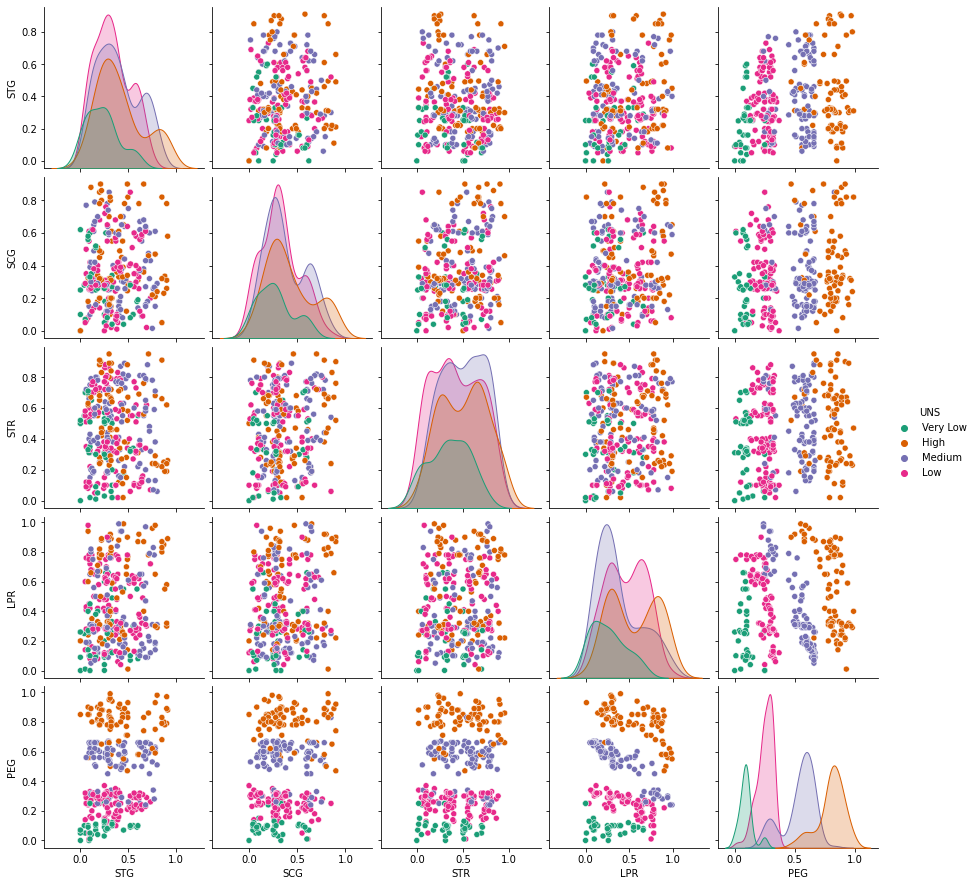

In [ ]:
sns.pairplot(df,hue='UNS', palette = 'Dark2')

clearly from visualization the best two features are LPR & PEG

In [ ]:
# convert categorical class labels under the ”UNS” column to numerical values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['UNS'])
le.fit(df_test['UNS'])
list(le.classes_)

['High', 'Low', 'Medium', 'Very Low']

In [ ]:
UNS_train = le.transform(df['UNS'])
UNS_test = le.transform(df_test['UNS'])
df.UNS = UNS_train
df_test.UNS = UNS_test
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,3
1,0.08,0.08,0.10,0.24,0.90,0
2,0.10,0.10,0.15,0.65,0.30,2
3,0.08,0.08,0.08,0.98,0.24,1
4,0.09,0.15,0.40,0.10,0.66,2


In [ ]:
#split the training data into xtrain and ytrain
xtrain = df.iloc[:, :-1]
ytrain = df.iloc[:,5]

#split the testing data into xtrain and ytrain
xtest = df_test.iloc[:, :-1]
ytest = df_test.iloc[:,5]

In [ ]:
#there is another way to select the two features
from sklearn.feature_selection import SelectKBest ,chi2
#using SelectKBest to choose two features
train_new = SelectKBest(chi2, k=2).fit_transform(xtrain,ytrain)
#the model also choose these two features ('LPR','PEG') 
type(train_new)

numpy.ndarray

In [ ]:
#choosing the same two feature in the test set
test_new = df_test[['LPR','PEG']].to_numpy()

## Important Functions

In [ ]:
#checking the accuracy of the model 
from sklearn.metrics import accuracy_score
def acc(Test , Predect):
  acc = accuracy_score(Test, Predect)
  return acc * 100

In [ ]:
#ploting confusion matrix
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

def con_matrix(predict,actual , title): 
  cm_svc = confusion_matrix(actual, predict)
  cm_display = ConfusionMatrixDisplay(cm_svc,display_labels=clf.classes_ , ).plot(cmap=plt.cm.Blues)
  plt.title(title)
  plt.show()
  return cm_display

In [ ]:
def fgf (actual , pred,title , clo ):
  cm_svc = confusion_matrix(actual, pred)
  cm_display = ConfusionMatrixDisplay(cm_svc,display_labels=clf.classes_ , ).plot(cmap=plt.cm.clo)
  plt.title(title)
  plt.show()
  return cm_svc 

In [ ]:
#ploting Decision Boundaries
import matplotlib.pyplot as plt

def decision_boundaries_multi (trainx ,trainy, model, title):

  plt.scatter(trainx[trainy == 0,0], trainx[trainy == 0,1], c='y', marker='v', label=0)
  plt.scatter(trainx[trainy == 1,0], trainx[trainy == 1,1], c='r', marker='o', label=1)
  plt.scatter(trainx[trainy == 2,0], trainx[trainy == 2,1], c='b', marker='*', label=2)
  plt.scatter(trainx[trainy == 3,0], trainx[trainy == 3,1], c='g', marker='+', label=3)

  x_min, x_max = trainx[:, 0].min() - 0.1, trainx[:, 0].max() + 0.1
  y_min, y_max = trainx[:, 1].min() - 0.1, trainx[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.009), np.arange(y_min, y_max, 0.009))

  z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z= z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.5)

  plt.title(title)
  plt.xlabel('LPR')
  plt.ylabel('PEG')
  plt.legend()
  plt.show()

In [ ]:
#ploting Decision Boundaries
import matplotlib.pyplot as plt

def decision_boundaries_binary (trainx ,trainy, model, title):

  plt.scatter(trainx[trainy == 0,0], trainx[trainy == 0,1], c='y', marker='v', label=0)
  plt.scatter(trainx[trainy == 1,0], trainx[trainy == 1,1], c='r', marker='o', label=1)


  x_min, x_max = trainx[:, 0].min() - 0.1, trainx[:, 0].max() + 0.1
  y_min, y_max = trainx[:, 1].min() - 0.1, trainx[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.009), np.arange(y_min, y_max, 0.009))

  z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z= z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.5)

  plt.title(title)
  plt.xlabel('LPR')
  plt.ylabel('PEG')
  plt.legend()
  plt.show()

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
def Binarizer(data):
  yb = (data).reshape((-1,1))
  mlb = MultiLabelBinarizer()
  yb = mlb.fit_transform(yb)
  return yb

In [ ]:
from sklearn import svm
def fiting (train , train_target , kernal ="linear"):
  model = svm.SVC(kernel=kernal, probability=True, C=200)
  model.fit(train, train_target)
  return model

In [ ]:
#prediction using OVR
def prediction (model, test ) :
  yb0_pred = model.predict(test)
  return yb0_pred

In [ ]:
#determine probability
def probabilities (model, test ,test_target) :
  yp=model.predict(test)
  print('Accuracy of clf: {:.2f}%'.format(acc(test_target,yp)))
  yb_proba = model.predict_proba(test)[:,1].reshape(-1,1)
  return yb_proba 

In [ ]:
# plotting correct and wrong prediction points
def plot_wrong_right(predected, actual, testset, color) :
  falses = predected != actual
  wrong = testset[falses]
  plt.scatter(testset[:,0], testset[:,1])
  plt.scatter(wrong[:,0], wrong[:,1], c=color)
  
  plt.show()

In [ ]:
def OVO(X , Y):
    k = []
    u = list(np.sort(ytrain.unique()))
    for i in u:
        for j in u[i+1 : ]:
            k.append([i,j])    
    
    train_data = [] 
    target = [] 

    for index , item in  enumerate(k) :
        train_data.append( X[ (Y == item[0]) | (Y == item[1])  ] )
        target.append( Y[ (Y == item[0]) | (Y == item[1])  ] )

    return train_data,target

## Applying **SUPPORT VECTOR MACHINE** and **PERCEPTRON** algorithms for classification

*Applying models*

In [ ]:
#svc model
from sklearn.svm import SVC
clf = SVC()
fited1 = clf.fit(train_new, ytrain)
predicted1 = clf.predict(test_new)

#Perceptron model
from sklearn.neural_network import MLPClassifier
pre = MLPClassifier()
fited2 = pre.fit(train_new, ytrain)
predicted2 = pre.predict(test_new)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
#determine accuracy
accuracy_svc = acc(ytest , predicted1)
accuracy_per = acc(ytest , predicted2)
print('SVC Accuracy: {}%'.format(accuracy_svc) )
print('Preceptron Accuracy: {}%'.format(accuracy_per) )

SVC Accuracy: 98.75%
Preceptron Accuracy: 88.75%


*ploting confusion matrix for each model*

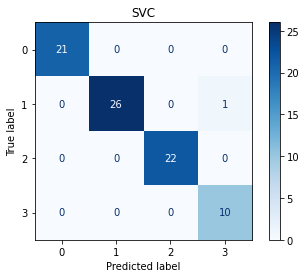

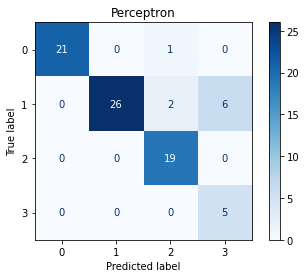

In [ ]:
#confusion matrix for SVC 
con_matrix(ytest, predicted1,'SVC')
#confusion matrix for Perceptron 
con_matrix(ytest, predicted2,'Perceptron')

ploting Decision Boundaries for each model

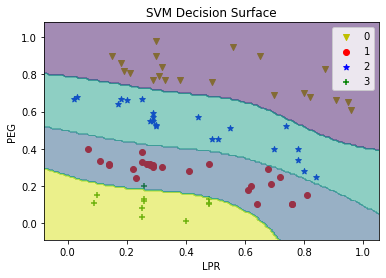

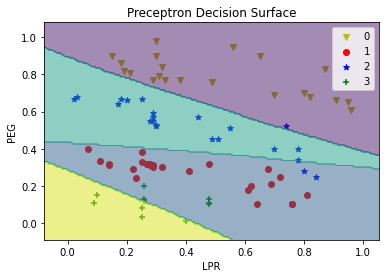

In [ ]:
#svc decision boundaries
decision_boundaries_multi(test_new , ytest ,clf , 'SVM Decision Surface')
#Preceptron decision boundaries
decision_boundaries_multi(test_new , ytest ,pre , 'Preceptron Decision Surface')

## OvR-SVM

*LabelBinarize*

In [ ]:
#LabelBinarize for target in train data set 
target_train = Binarizer(ytrain.values)
yb0 = target_train[:,0]
yb1 = target_train[:,1]
yb2 = target_train[:,2]
yb3 = target_train[:,3]

#LabelBinarize for target in test data set 
target_test = Binarizer(ytest.values)
yc0 = target_test[:,0]
yc1 = target_test[:,1]
yc2 = target_test[:,2]
yc3 = target_test[:,3]

#fit the model 
model0 = fiting (train_new , yb0)
model1 = fiting (train_new , yb1 , "rbf")
model2 = fiting (train_new , yb2,"rbf")
model3 = fiting (train_new , yb3,)

  
#prediction using OVR
prd0 = prediction (model0, test_new)
prd1 = prediction (model1, test_new)
prd2 = prediction (model2, test_new)
prd3 = prediction (model3, test_new)

ploting **confusion matrix** & **Decision Boundaries** & **correct and wrong prediction points** for each model

model_0

Accuracy of clf: 100.00%


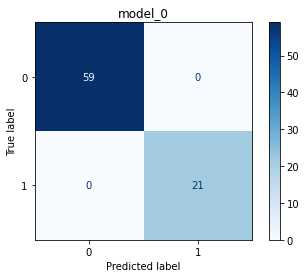

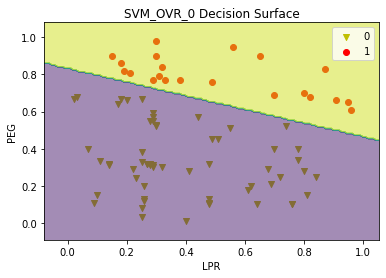

 correct and wrong prediction points for model_0


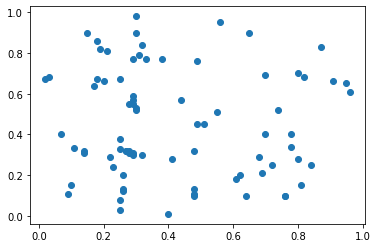

In [ ]:
#confusion matrix for model_0 
pro0 = probabilities (model0, test_new,  yc0)
con_matrix(prd0,yc0, 'model_0')
#Decision Boundaries for model_0
decision_boundaries_binary(test_new , yc0 ,model0 , 'SVM_OVR_0 Decision Surface',)
# plotting correct and wrong prediction points for model_0
print(" correct and wrong prediction points for model_0")
plot_wrong_right(prd0, yc0, test_new, 'r') 

**model_1**

Accuracy of clf: 96.25%


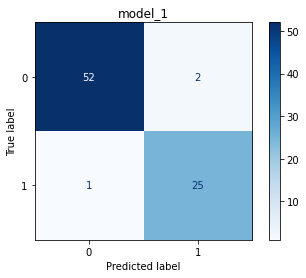

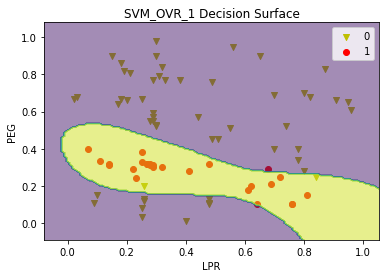

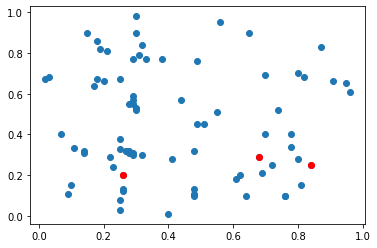

In [ ]:
#confusion matrix for model_1 
pro1 = probabilities(model1, test_new,  yc1)
con_matrix(prd1,yc1,'model_1')
#Decision Boundaries for model_1
decision_boundaries_binary(test_new , yc1 ,model1 , 'SVM_OVR_1 Decision Surface')
# plotting correct and wrong prediction points for model_1
plot_wrong_right(prd1, yc1, test_new, 'r') 

**model_2**

Accuracy of clf: 96.25%


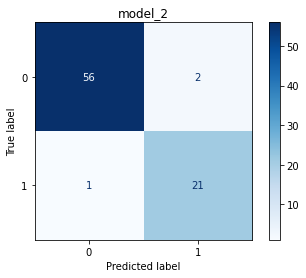

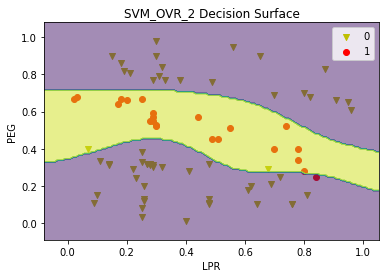

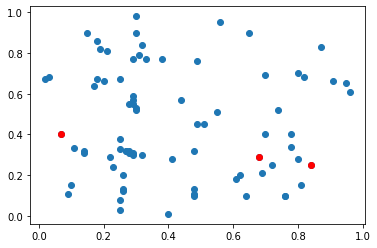

In [ ]:
#confusion matrix for model_2 
pro2 = probabilities (model2, test_new,  yc2)
con_matrix(prd2,yc2,'model_2')
#Decision Boundaries for model_2
decision_boundaries_binary(test_new , yc2 ,model2 , 'SVM_OVR_2 Decision Surface')
# plotting correct and wrong prediction points for model_1
plot_wrong_right(prd2, yc2, test_new, 'r') 

**model_3**

Accuracy of clf: 100.00%


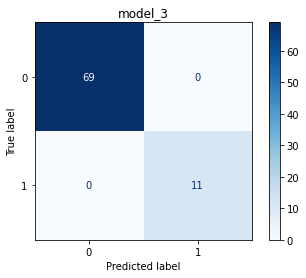

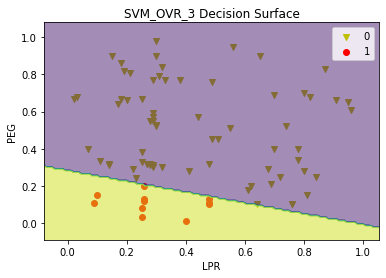

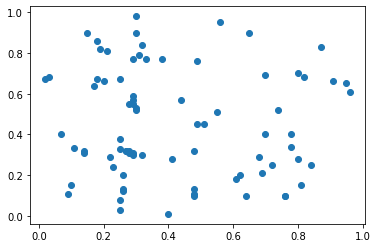

In [ ]:
#confusion matrix for model_3 
pro3 = probabilities (model3, test_new,  yc3)
con_matrix(prd3,yc3,'model_3')
#Decision Boundaries for model_3
decision_boundaries_binary(test_new , yc3 ,model3 , 'SVM_OVR_3 Decision Surface')
# plotting correct and wrong prediction points for model_1
plot_wrong_right(prd3, yc3, test_new, 'r') 

In [ ]:
#final prediction for OvR model
yb_all = np.hstack((pro0, pro1, pro2, pro3 ))
finalovr = np.argmax(yb_all , axis=1)
finalovr

array([2, 2, 2, 3, 0, 0, 2, 0, 1, 2, 2, 2, 0, 3, 0, 1, 2, 0, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 3, 1, 1, 1, 0, 1, 2,
       1, 0, 1, 0, 3, 1, 2, 0, 1, 0, 1, 3, 1, 1, 2, 0, 0, 1, 3, 2, 1, 3,
       3, 3, 0, 1, 1, 1, 1, 2, 2, 2, 1, 3, 0, 1])

Accuracy of OvR Model: 96.25%


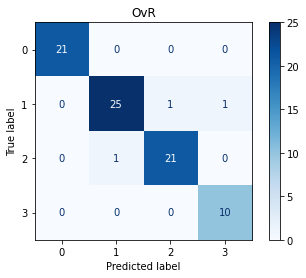

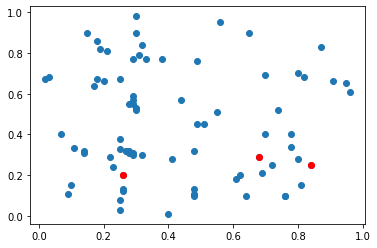

In [ ]:
#confusion matrix for OvR 
print('Accuracy of OvR Model: {:.2f}%'.format(acc(ytest,finalovr)))
con_matrix(ytest,finalovr,'OvR')

# plotting correct and wrong prediction points for OvR
plot_wrong_right(finalovr, ytest, test_new, 'r') 

## OvO-SVM

In [ ]:
#Train DataFram
traindatafram = pd.DataFrame(train_new)
traindatafram["UNS"] = ytrain 
#Test DataFram
testdatafram=pd.DataFrame(test_new)
testdatafram["UNS"] = ytest 

In [ ]:
#partitioning of train data and target
traindata, traintarget = OVO(traindatafram.iloc[:,0:2] , traindatafram.iloc[:,2]) 
#partitioning of train data and target
testdata, testtarget = OVO(testdatafram.iloc[:,0:2] , testdatafram.iloc[:,2]) 

Accuracy of mod0 Model: 100.00%


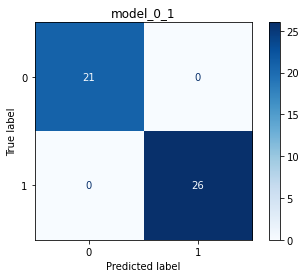

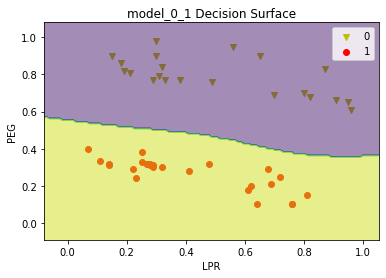

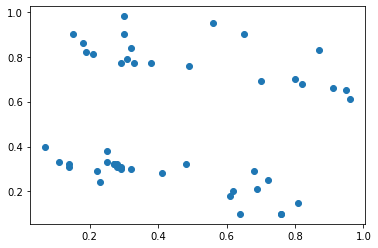

In [ ]:
#fiting models and prediction process
mod0=fiting(traindata[0],traintarget[0] , kernal = 'rbf')
pred0 = prediction(mod0, testdata[0])
print('Accuracy of mod0 Model: {:.2f}%'.format(acc(testtarget[0],pred0)))
#probability 0_1
p0 = mod0.predict_proba(test_new)
x_0_p0 = p0[:,0].reshape(-1,1)
x_1_p0 = p0[:,1].reshape(-1,1)
#confusion matrix for model_0_1 
con_matrix(pred0,testtarget[0] ,'model_0_1')
#Decision Boundaries for model_0_1
decision_boundaries_binary(test_new,ytest,mod0, 'model_0_1 Decision Surface',)
# plotting correct and wrong prediction points for model_0_1
plot_wrong_right(pred0, testtarget[0].to_numpy(), testdata[0].to_numpy(), 'r') 

Accuracy of mod0 Model: 100.00%


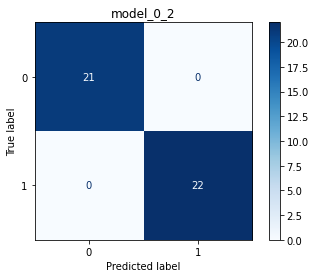

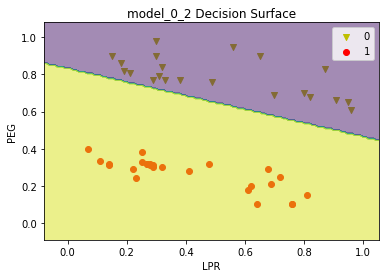

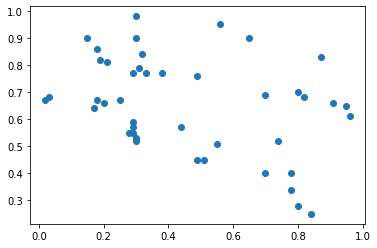

In [ ]:
#fiting models and prediction process
mod1=fiting(traindata[1],traintarget[1])
pred1 = prediction(mod1, testdata[1])
print('Accuracy of mod0 Model: {:.2f}%'.format(acc(testtarget[1],pred1)))
#probability 0_2
p1 = mod1.predict_proba(test_new)
x_0_p1 = p1[:,0].reshape(-1,1)
x_2_p1 = p1[:,1].reshape(-1,1)
#confusion matrix for model_0_2
con_matrix(pred1,testtarget[1] ,'model_0_2')
#Decision Boundaries for model_0_2
decision_boundaries_binary(test_new,ytest,mod1, 'model_0_2 Decision Surface',)
# plotting correct and wrong prediction points for model_0_2
plot_wrong_right(pred1, testtarget[1].to_numpy(), testdata[1].to_numpy(), 'r') 

Accuracy of mod0 Model: 100.00%


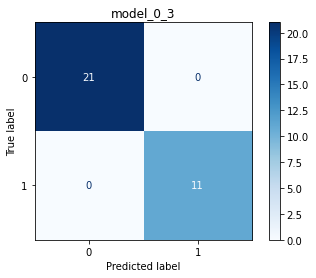

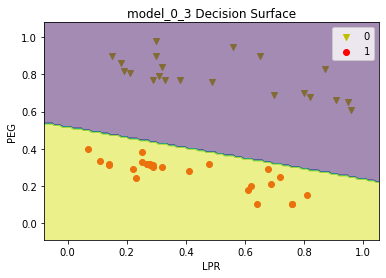

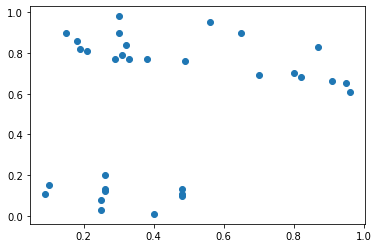

In [ ]:
#fiting models and prediction process
mod2=fiting(traindata[2],traintarget[2])
pred2 = prediction(mod2, testdata[2])
print('Accuracy of mod0 Model: {:.2f}%'.format(acc(testtarget[2],pred2)))
#probability 0_3
p2 = mod2.predict_proba(test_new)
x_0_p2 = p2[:,0].reshape(-1,1)
x_3_p2 = p2[:,1].reshape(-1,1)
#confusion matrix for model_0_3
con_matrix(pred2,testtarget[2] ,'model_0_3')
#Decision Boundaries for model_0_3
decision_boundaries_binary(test_new,ytest,mod2, 'model_0_3 Decision Surface',)
# plotting correct and wrong prediction points for model_0_3
plot_wrong_right(pred2, testtarget[2].to_numpy(), testdata[2].to_numpy(), 'r') 

Accuracy of mod0 Model: 97.92%


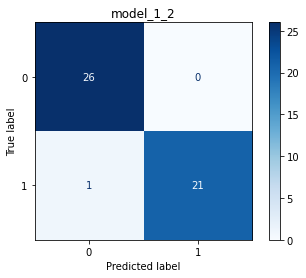

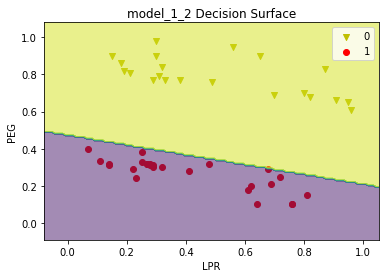

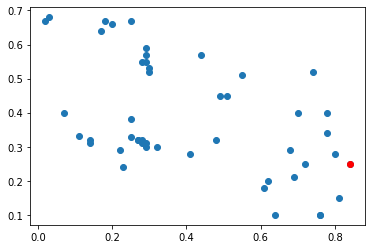

In [ ]:
#fiting models and prediction process
mod3=fiting(traindata[3],traintarget[3])
pred3 = prediction(mod3, testdata[3])
print('Accuracy of mod0 Model: {:.2f}%'.format(acc(testtarget[3],pred3)))
#probability 1_2
p3 = mod3.predict_proba(test_new)
x_1_p3 = p3[:,0].reshape(-1,1)
x_2_p3 = p3[:,1].reshape(-1,1)
#confusion matrix for model_1_2
con_matrix(pred3,testtarget[3] ,'model_1_2')
#Decision Boundaries for model_1_2
decision_boundaries_binary(test_new,ytest,mod3, 'model_1_2 Decision Surface',)
# plotting correct and wrong prediction points for model_1_2
plot_wrong_right(pred3, testtarget[3].to_numpy(), testdata[3].to_numpy(), 'r') 

Accuracy of mod0 Model: 94.59%


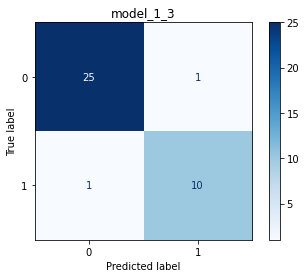

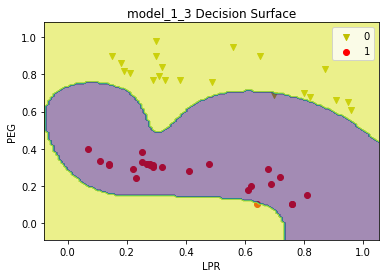

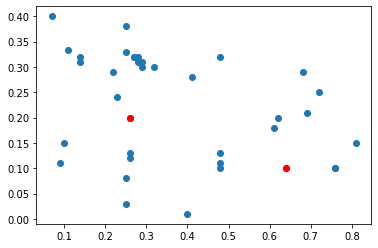

In [ ]:
#fiting models and prediction process
mod4=fiting(traindata[4],traintarget[4], kernal = 'rbf')
pred4 = prediction(mod4, testdata[4])
print('Accuracy of mod0 Model: {:.2f}%'.format(acc(testtarget[4],pred4)))
#probability 1_3
p4 = mod4.predict_proba(test_new)
x_1_p4 = p4[:,0].reshape(-1,1)
x_3_p4 = p4[:,1].reshape(-1,1)
#confusion matrix for model_1_3
con_matrix(pred4,testtarget[4] ,'model_1_3')
#Decision Boundaries for model_1_3
decision_boundaries_binary(test_new,ytest,mod4, 'model_1_3 Decision Surface',)
# plotting correct and wrong prediction points for model_1_3
plot_wrong_right(pred4,testtarget[4].to_numpy(), testdata[4].to_numpy(), 'r') 

Accuracy of mod0 Model: 100.00%


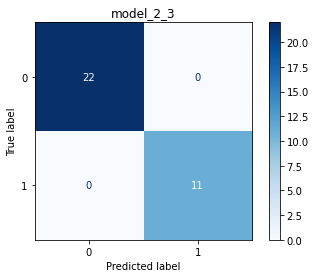

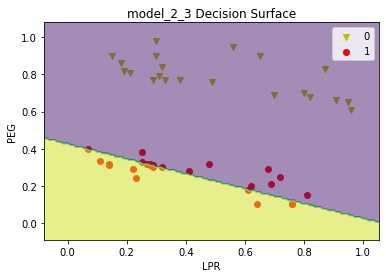

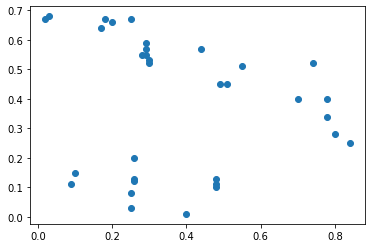

In [ ]:
#fiting models and prediction process
mod5=fiting(traindata[5],traintarget[5])
pred5 = prediction(mod5,  testdata[5])
print('Accuracy of mod0 Model: {:.2f}%'.format(acc(testtarget[5],pred5)))
#probability 2_3
p5 = mod5.predict_proba(test_new)
x_2_p5 = p5[:,0].reshape(-1,1)
x_3_p5 = p5[:,1].reshape(-1,1)
#confusion matrix for model_2_3
con_matrix(pred5,testtarget[5] ,'model_2_3')
#Decision Boundaries for model_2_3
decision_boundaries_binary(test_new,ytest,mod5, 'model_2_3 Decision Surface',)
# plotting correct and wrong prediction points for model_2_3
plot_wrong_right(pred5,testtarget[5].to_numpy(), testdata[5].to_numpy(), 'r') 

In [ ]:
#aggregate probabilities for each class
probabilities_of_0 = x_0_p0 + x_0_p1 +x_0_p2
probabilities_of_1 = x_1_p0 + x_1_p3 +x_1_p4
probabilities_of_2 = x_2_p1 + x_2_p3 +x_2_p5
probabilities_of_3 = x_3_p2 + x_3_p4 +x_3_p5

In [ ]:
#final prediction for OvO model
yb_allovo = np.hstack((probabilities_of_0, probabilities_of_1, probabilities_of_2, probabilities_of_3 ))
finalovo = np.argmax(yb_allovo , axis=1)
finalovo

array([2, 2, 2, 3, 0, 0, 2, 0, 1, 2, 2, 1, 0, 3, 0, 1, 2, 0, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 3, 1, 1, 1, 0, 1, 2,
       1, 0, 1, 0, 3, 1, 2, 0, 1, 0, 1, 3, 1, 1, 2, 0, 0, 1, 3, 2, 1, 3,
       3, 3, 0, 1, 1, 1, 1, 2, 2, 2, 1, 3, 0, 3])

Accuracy of OvO Model: 96.25%


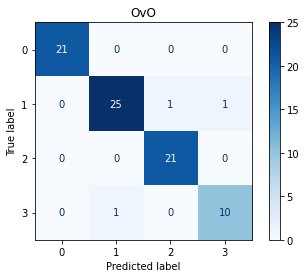

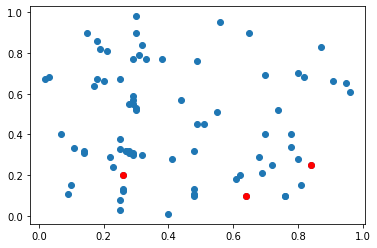

In [ ]:
#confusion matrix for OvO
print('Accuracy of OvO Model: {:.2f}%'.format(acc(ytest,finalovo)))
con_matrix(ytest,finalovo,'OvO')
# plotting correct and wrong prediction points for OvR
plot_wrong_right(finalovo, ytest, test_new, 'r') 